# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [197]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# Load the dataset
df = pd.read_csv("soil_measures.csv")
df.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


# Find the feature in the dataset that produces the best score for predicting "crop".

In [198]:
# all columns are numerical except the target column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [199]:
# vary good there is no missing values
df.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [200]:
# look at the target column distribution
df["crop"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

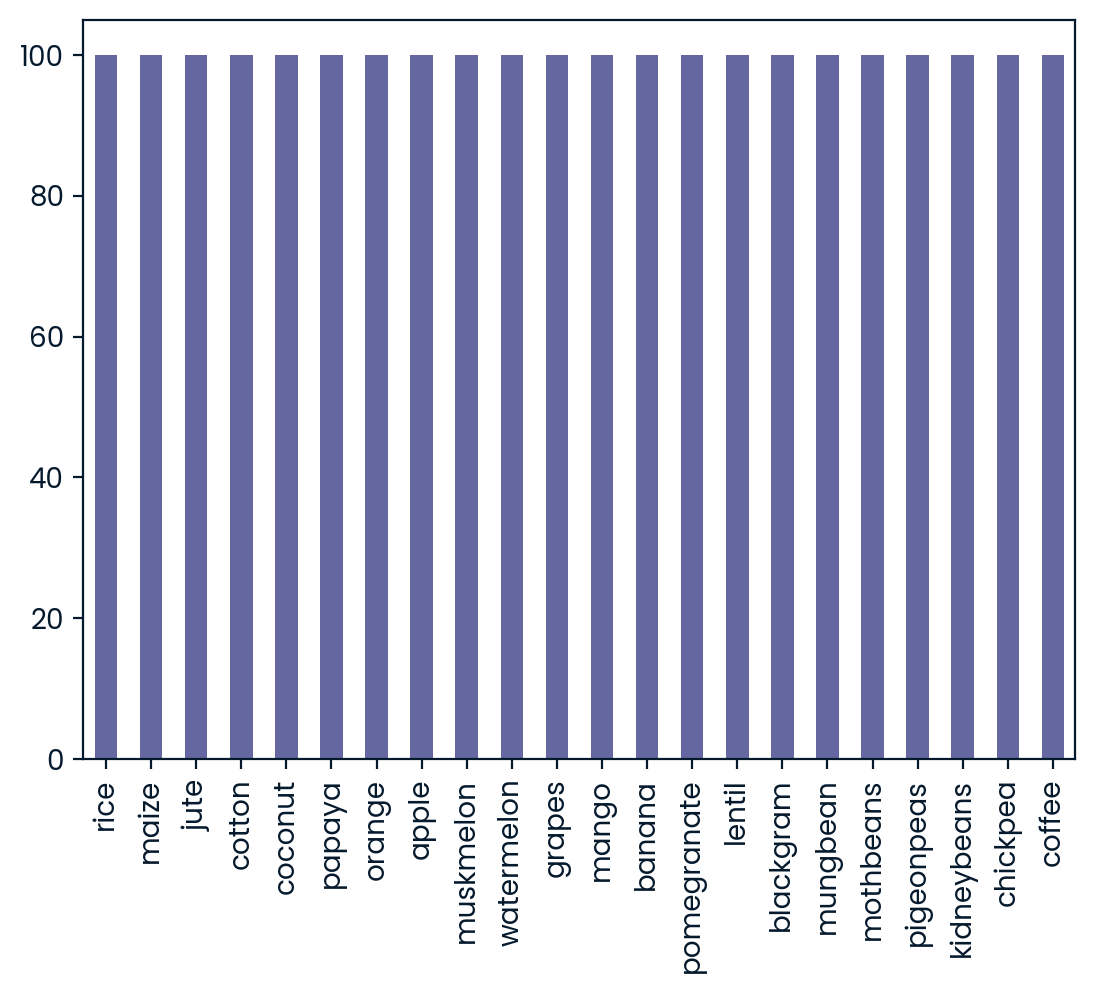

In [201]:
# look at the target column distribution
df["crop"].value_counts().plot(kind="bar")
plt.show()

In [202]:
# convert the target column to numerical "crop"
label_encoder = LabelEncoder()
df['crop'] = label_encoder.fit_transform(df['crop'])
df.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,20
1,85,58,41,7.038096,20
2,60,55,44,7.840207,20
3,74,35,40,6.980401,20
4,78,42,42,7.628473,20


In [203]:
# look at the target column distribution after converting the target column
df["crop"].value_counts().sort_values()

20    100
9     100
18    100
13    100
14    100
2     100
10    100
19    100
1     100
12    100
7     100
21    100
15    100
0     100
16    100
17    100
4     100
6     100
8     100
11    100
3     100
5     100
Name: crop, dtype: int64

In [204]:
# seperate the features and target
X = df.drop("crop", axis=1)
y = df["crop"]

In [205]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
feature_performance = {}
for feature in ["N", "P", "K", "ph"]:
    
    # apply logistic regression on each feature
    log_reg = LogisticRegression(multi_class="multinomial")
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    
    # evaluate the feature model
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    
    # Add feature-f1 score pairs to the dictionary
    feature_performance[feature] = f1
    print(f"F1-score for {feature}: {f1}")

F1-score for N: 0.09149868209906838
F1-score for P: 0.14761942909728204
F1-score for K: 0.23896974566001802
F1-score for ph: 0.04532731061152114


In [207]:
# create a variable called best_predictive_feature to store the best feature 
best_predictive_feature = {"K": feature_performance["K"]}
best_predictive_feature

{'K': 0.23896974566001802}

# The feature "K" (Potassium content) has the highest influence on the soil because:
 1. Potassium is essential for plant growth, affecting water uptake, enzyme activation, and photosynthesis.
 2. The logistic regression model showed the highest F1-score for "K", indicating it is the most predictive feature.
 3. High potassium levels improve crop yield and resistance to diseases, making it a critical factor in soil fertility.